## Laptop Price Prediction: Data Analysis

In [1]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt 

In [3]:
pd.set_option('display.max_columns', 30)

In [ ]:
# Load the dataset
csv_file = "D:\Projectwork Platform\MEP-Machine-Learning\Laptop_Price_Prediction\ebay_laptop_dataset.csv"
laptop_df = pd.read_csv(csv_file)
laptop_df.head()

,Brand,Price,Currency,Color,Features,Condition,Condition Description,Seller Note,GPU,Processor,Processor Speed,Processor Speed Unit,Type,Width of the Display,Height of the Display,OS,Storage Type,Hard Drive Capacity,Hard Drive Capacity Unit,SSD Capacity,SSD Capacity Unit,Screen Size (inch),Ram Size,Ram Size Unit
0,other,303.80,$,gray,"Backlit Keyboard, Built-in Microphone, Built...",New,"A brand-new, unused, unopened, undamaged item ...",undefined,intel,quad core,3.80,GHz,notebook/laptop,2160.0,1440.0,windows,ssd,512.0,gb,1.0,tb,14,8.0,gb
1,dell,400.00,$,black,"Backlit Keyboard, Bluetooth, Built-in Micropho...",Very Good - Refurbished,The item shows minimal wear and is backed by a...,aaa pcs is a microsoft authorized refurbisher ...,intel,intel core i7 8th generation,4.20,GHz,notebook/laptop,1920.0,1080.0,windows,ssd,2.0,tb,NaN,unknown,14,NaN,unknown
2,dell,175.00,$,black,"10/100 LAN Card, Backlit Keyboard, Bluetooth, ...",Used,An item that has been used previously. The ite...,"well kept, fully functional, includes battery,...",intel,intel core i5-6300u,2.40,GHz,notebook/laptop,1920.0,1080.0,windows,ssd,500.0,gb,500.0,gb,14,16.0,gb
3,hp,85.00,$,black,"Bluetooth, Built-in Microphone, Built-in Webca...",Good - Refurbished,The item shows moderate wear and is backed by ...,1-year allstate warranty. the original hp char...,intel,intel celeron n,2.40,GHz,notebook/laptop,1366.0,768.0,chrome,emmc,16.0,gb,NaN,unknown,11.6,4.0,gb
4,dell,101.25,$,other,"10/100 LAN Card, Built-in Microphone, Built-in...",Good - Refurbished,The item shows moderate wear and is backed by ...,laptops is tested & fully working with some si...,other,intel core i5 6th generation,1.40,GHz,notebook/laptop,1366.0,768.0,windows,ssd,NaN,unknown,256.0,gb,12.5,8.0,gb


## EDA: Approach

+ Descriptive Analysis: Check statistical summary, missing value
+ Analyze distribution based on key features (RAM, Processors, etc.)
+ Check correlations between features and target variable (price)
+ Visualise trends using histograms, scatter plots, box plots

## Descrptive Analysis

In [5]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4183 entries, 0 to 4182
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brand                     4183 non-null   object 
 1   Price                     4183 non-null   float64
 2   Currency                  4183 non-null   object 
 3   Color                     4183 non-null   object 
 4   Features                  1993 non-null   object 
 5   Condition                 4183 non-null   object 
 6   Condition Description     4183 non-null   object 
 7   Seller Note               4183 non-null   object 
 8   GPU                       4183 non-null   object 
 9   Processor                 4183 non-null   object 
 10  Processor Speed           2090 non-null   object 
 11  Processor Speed Unit      4183 non-null   object 
 12  Type                      4183 non-null   object 
 13  Width of the Display      1915 non-null   float64
 14  Height o

**Null values distribution**

In [6]:
laptop_df.isnull().sum()

Brand                          0
Price                          0
Currency                       0
Color                          0
Features                    2190
Condition                      0
Condition Description          0
Seller Note                    0
GPU                            0
Processor                      0
Processor Speed             2093
Processor Speed Unit           0
Type                           0
Width of the Display        2268
Height of the Display       2268
OS                             0
Storage Type                   0
Hard Drive Capacity         3079
Hard Drive Capacity Unit       0
SSD Capacity                2056
SSD Capacity Unit              0
Screen Size (inch)          1638
Ram Size                    2531
Ram Size Unit                  0
dtype: int64

The information of the descriptive summary shows there re 23 features in the dataset and 4183 records, which are considered as laptops. Meticulously, the dataset shows columns with a clear amount of missing values that need to be removed during the process. The features with missing values are:

+ Features
+ Processor Speed
+ Width of the Dsplay
+ Height of the Display
+ Hard Drive Capacity
+ SSD Capacity
+ Screen Size
+ Ram Size

For this phase we focus on how these null values are distributed. The process of removing these values will be handled in the data preprocessing steps. 

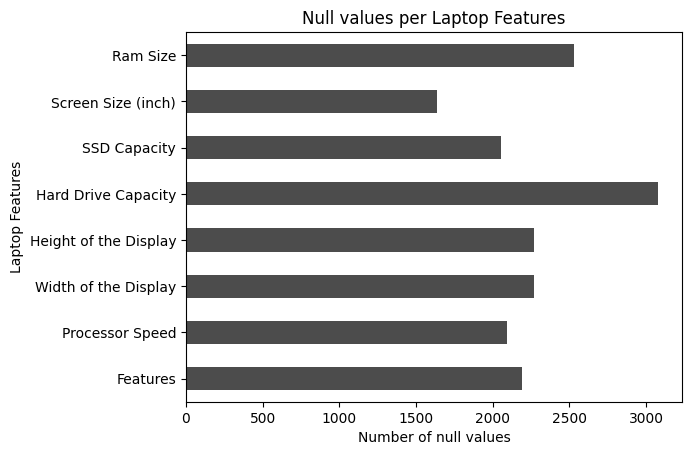

In [7]:
# Create a plot for displaying the nullvalues per column
# Extract the columns that has nullvalues 

cols_with_null = laptop_df.columns[laptop_df.isnull().any() == True]
nul_values = laptop_df[cols_with_null].isnull().sum()
nul_values.plot(kind='barh', color='black' ,alpha=0.7)
plt.title("Null values per Laptop Features")
plt.xlabel("Number of null values")
plt.ylabel("Laptop Features")
plt.show()

This barplot shows a distribution of the possible null values that are spread among the features. The feature with the highest number of null values which counts almost 3000 null values is the Hard Drive Capacity. This feature is crucial for training the model because the objective of the project is to train the model that predicts future prices of new updated laptops in the market based on their specification. The Hard Drive Capacity is one of the specifciation that influences the price. In more thorough study will be discussed in making the correlation map of all features with the price variable (considered as the target variable of this project)

**Statistical Summary of the dataset**

In [8]:
# Give the statistical summary of the dataset
laptop_df.describe()

,Price,Width of the Display,Height of the Display,Hard Drive Capacity,SSD Capacity,Ram Size
count,4183.000000,1915.000000,1915.000000,1104.000000,2127.000000,1652.000000
mean,328.130117,1702.125326,978.471018,227.202899,268.342266,20.483656
std,387.640478,463.409973,294.198849,201.231991,224.996614,205.062639
min,4.420000,800.000000,480.000000,0.000000,0.000000,1.000000
25%,100.000000,1363.000000,768.000000,16.000000,120.000000,4.000000
50%,234.000000,1920.000000,1080.000000,256.000000,240.000000,8.000000
75%,413.200000,1920.000000,1080.000000,500.000000,480.000000,16.000000
max,3900.000000,3840.000000,2400.000000,800.000000,1024.000000,8192.000000


The statistical summary describes how the data is distributed. The average price of the laptop is pricesly 328.13$ although the maximum price is 3900$ due to the maximum specifications of the laptop. Despite the minimum price is around 4.42$ which isn't realistic. This is caused by the vast amount of null values that needed to be removed in the preprocessing step.

## Univariate Analysis

The univariate analysis enables to analyse the distribution of the feature individually. To gain more insight on the distribution for each given feature of the laptop, we consider all features that need to be investigated.

In [9]:
laptop_df.head(3)

,Brand,Price,Currency,Color,Features,Condition,Condition Description,Seller Note,GPU,Processor,Processor Speed,Processor Speed Unit,Type,Width of the Display,Height of the Display,OS,Storage Type,Hard Drive Capacity,Hard Drive Capacity Unit,SSD Capacity,SSD Capacity Unit,Screen Size (inch),Ram Size,Ram Size Unit
0,other,303.8,$,gray,"Backlit Keyboard, Built-in Microphone, Built...",New,"A brand-new, unused, unopened, undamaged item ...",undefined,intel,quad core,3.80,GHz,notebook/laptop,2160.0,1440.0,windows,ssd,512.0,gb,1.0,tb,14,8.0,gb
1,dell,400.0,$,black,"Backlit Keyboard, Bluetooth, Built-in Micropho...",Very Good - Refurbished,The item shows minimal wear and is backed by a...,aaa pcs is a microsoft authorized refurbisher ...,intel,intel core i7 8th generation,4.20,GHz,notebook/laptop,1920.0,1080.0,windows,ssd,2.0,tb,NaN,unknown,14,NaN,unknown
2,dell,175.0,$,black,"10/100 LAN Card, Backlit Keyboard, Bluetooth, ...",Used,An item that has been used previously. The ite...,"well kept, fully functional, includes battery,...",intel,intel core i5-6300u,2.40,GHz,notebook/laptop,1920.0,1080.0,windows,ssd,500.0,gb,500.0,gb,14,16.0,gb


Using the univariate analysis we will seperate the feature data into more distinct categories:
+ Univariate analysis for categorical variables
+ Univariate analysis for numerical variables

### Univariate Analysis for categorical variables

The approach is as follows:
+ Identify the uniqueness of the variable
+ Visualise the distribution per each categorical variable using BarPlot
+ Distinguish which variables are relevant and irrelevant for training the model

In [10]:
# Define function: show distribution of a feature
def feature_distribution(feature):
    feature_dist = laptop_df.groupby(feature).size()
    feature_dist.plot(kind='barh', color='black', alpha=0.7)

Identify the uniqueness of the variable

In [15]:
laptop_catdf = laptop_df[['Brand', 'Currency', 'Color', 'Features', 'Condition',
       'Condition Description', 'Seller Note', 'GPU', 'Processor',
       'Processor Speed Unit', 'Type',
       'OS', 'Storage Type',
      'Hard Drive Capacity Unit', 
       'SSD Capacity Unit', 'Ram Size Unit']]
laptop_catdf.head()

,Brand,Currency,Color,Features,Condition,Condition Description,Seller Note,GPU,Processor,Processor Speed Unit,Type,OS,Storage Type,Hard Drive Capacity Unit,SSD Capacity Unit,Ram Size Unit
0,other,$,gray,"Backlit Keyboard, Built-in Microphone, Built...",New,"A brand-new, unused, unopened, undamaged item ...",undefined,intel,quad core,GHz,notebook/laptop,windows,ssd,gb,tb,gb
1,dell,$,black,"Backlit Keyboard, Bluetooth, Built-in Micropho...",Very Good - Refurbished,The item shows minimal wear and is backed by a...,aaa pcs is a microsoft authorized refurbisher ...,intel,intel core i7 8th generation,GHz,notebook/laptop,windows,ssd,tb,unknown,unknown
2,dell,$,black,"10/100 LAN Card, Backlit Keyboard, Bluetooth, ...",Used,An item that has been used previously. The ite...,"well kept, fully functional, includes battery,...",intel,intel core i5-6300u,GHz,notebook/laptop,windows,ssd,gb,gb,gb
3,hp,$,black,"Bluetooth, Built-in Microphone, Built-in Webca...",Good - Refurbished,The item shows moderate wear and is backed by ...,1-year allstate warranty. the original hp char...,intel,intel celeron n,GHz,notebook/laptop,chrome,emmc,gb,unknown,gb
4,dell,$,other,"10/100 LAN Card, Built-in Microphone, Built-in...",Good - Refurbished,The item shows moderate wear and is backed by ...,laptops is tested & fully working with some si...,other,intel core i5 6th generation,GHz,notebook/laptop,windows,ssd,unknown,gb,gb


Identify uniqueness of the dataset

In [23]:
# Define list for storing features
uniq_cateogiies = []
nuniqu_categories = []

# Iterate the categorical features
for feature in laptop_catdf.columns:
    feature_data = laptop_catdf[feature]
    uniqueness = feature_data.unique()
    unique_size = len(uniqueness)

    if unique_size <= 10:
        uniq_cateogiies.append(feature)
        print(f"{feature} has {unique_size} unique values")
        print(uniqueness)
    else:
        nuniqu_categories.append(feature)
        print(f"Feature {feature} is not unique")

for i in range(1):
    print("-"*1000, end="")
    print("\n")

print(f"Unique categories: {uniq_cateogiies}")


Brand has 10 unique values
['other' 'dell' 'hp' 'acer' 'lenovo' 'samsung' 'microsoft' 'lg' 'asus'
 'auo']
Currency has 1 unique values
['$']
Feature Color is not unique
Feature Features is not unique
Condition has 10 unique values
['New' 'Very Good - Refurbished' 'Used' 'Good - Refurbished' 'Undefined'
 'Excellent - Refurbished' 'Open box' 'For parts or not working'
 'Seller refurbished' 'Certified - Refurbished']
Condition Description has 10 unique values
["A brand-new, unused, unopened, undamaged item in its original packaging (where packaging is applicable). Packaging should be the same as what is found in a retail store, unless the item is handmade or was packaged by the manufacturer in non-retail packaging, such as an unprinted box or plastic bag. See the seller's listing for full details."
 "The item shows minimal wear and is backed by a one year warranty. It is fully functional and has been professionally refurbished, inspected and cleaned to very good condition by qualified sel

Visualise unique categorical variables using barplots

In [27]:
laptop_catdf[uniq_cateogiies].head()

,Brand,Currency,Condition,Condition Description,GPU,Processor Speed Unit,Type,OS,Storage Type,Hard Drive Capacity Unit,SSD Capacity Unit,Ram Size Unit
0,other,$,New,"A brand-new, unused, unopened, undamaged item ...",intel,GHz,notebook/laptop,windows,ssd,gb,tb,gb
1,dell,$,Very Good - Refurbished,The item shows minimal wear and is backed by a...,intel,GHz,notebook/laptop,windows,ssd,tb,unknown,unknown
2,dell,$,Used,An item that has been used previously. The ite...,intel,GHz,notebook/laptop,windows,ssd,gb,gb,gb
3,hp,$,Good - Refurbished,The item shows moderate wear and is backed by ...,intel,GHz,notebook/laptop,chrome,emmc,gb,unknown,gb
4,dell,$,Good - Refurbished,The item shows moderate wear and is backed by ...,other,GHz,notebook/laptop,windows,ssd,unknown,gb,gb


Feature name: Brand


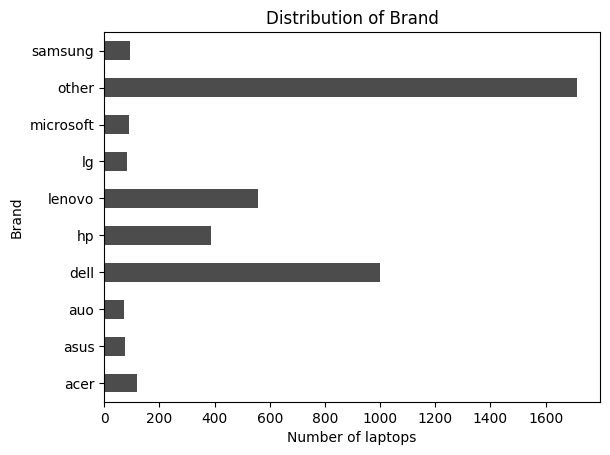

Feature name: Currency


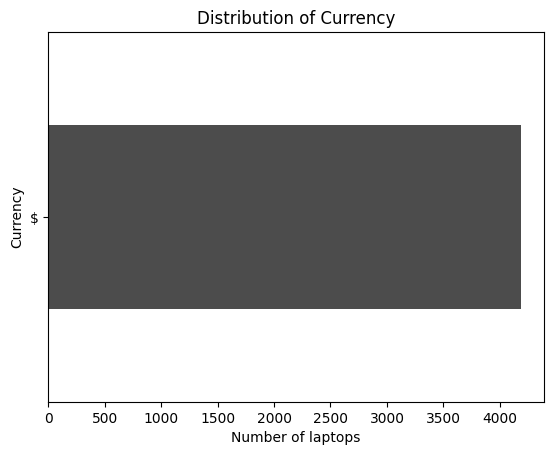

Feature name: Condition


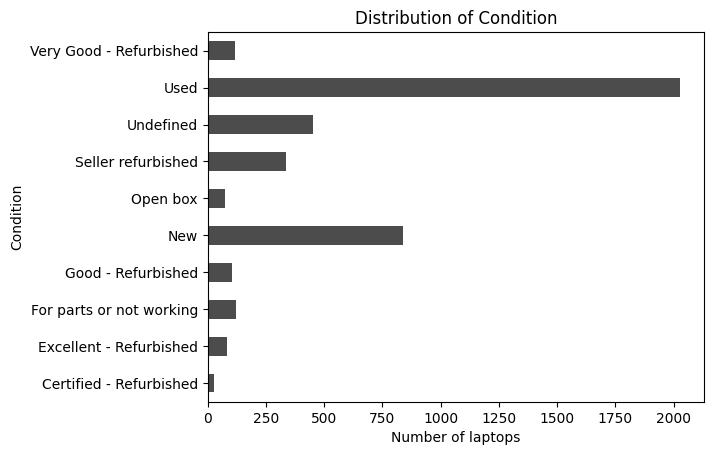

Feature name: Condition Description


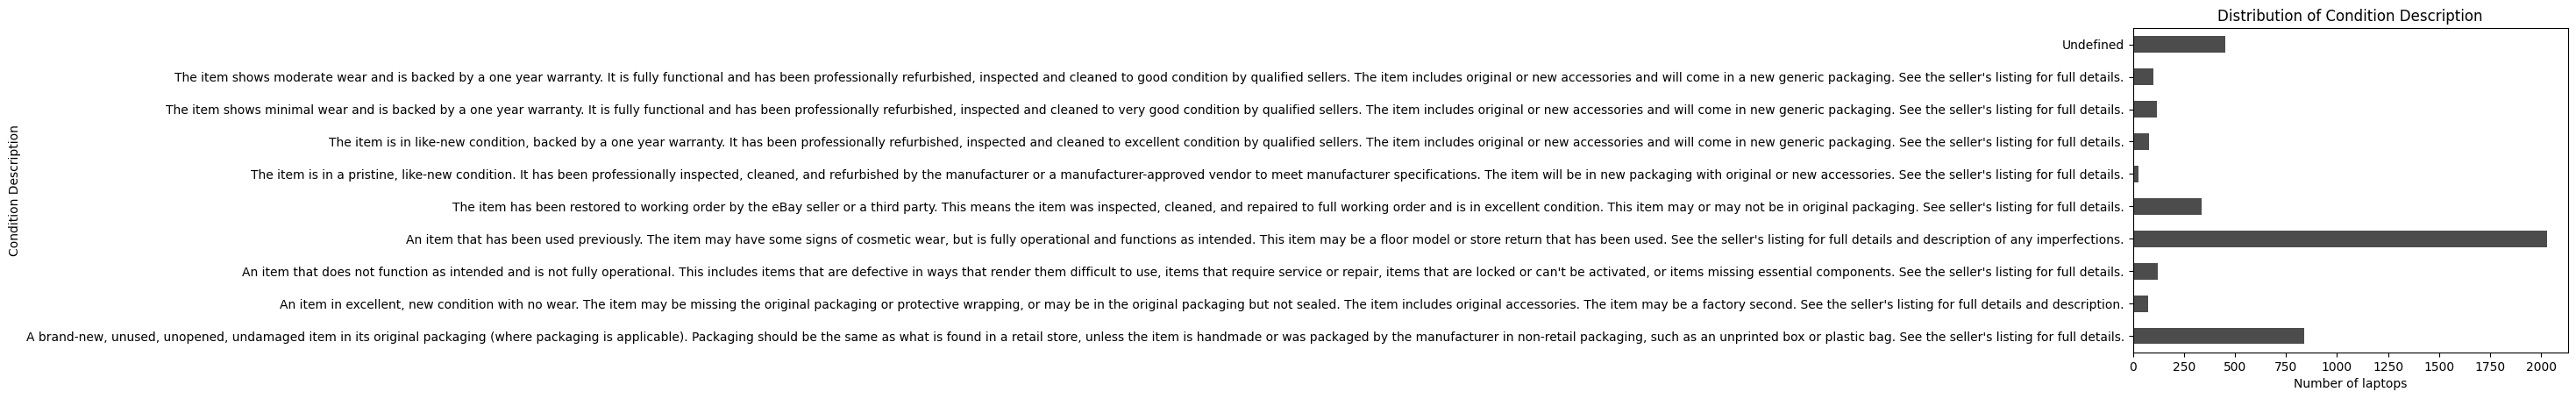

Feature name: GPU


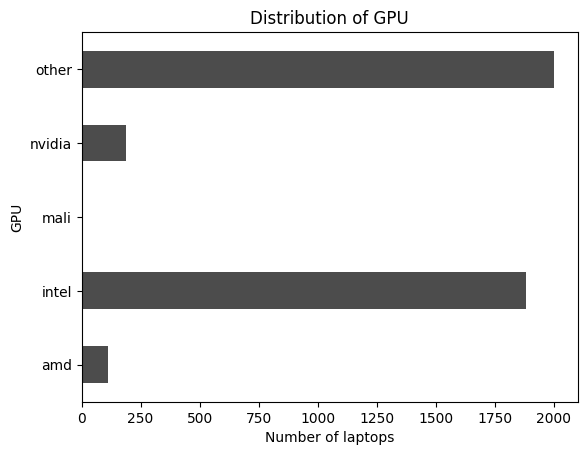

Feature name: Processor Speed Unit


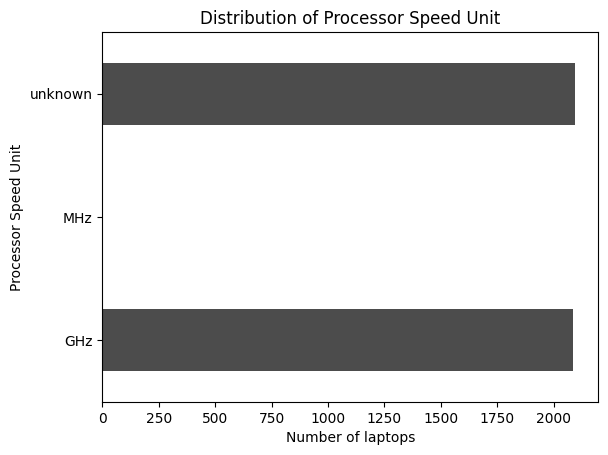

Feature name: Type


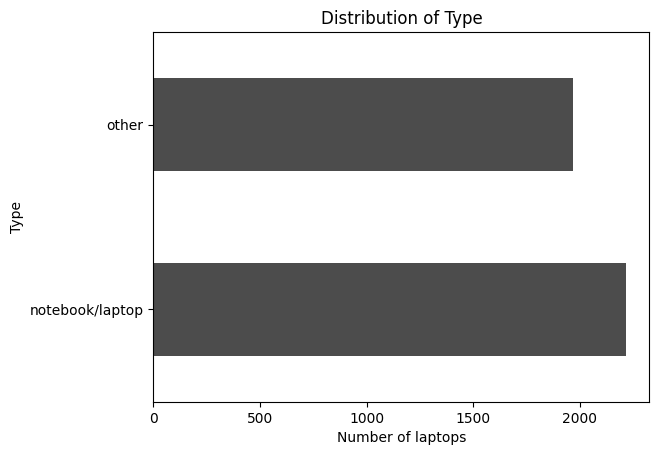

Feature name: OS


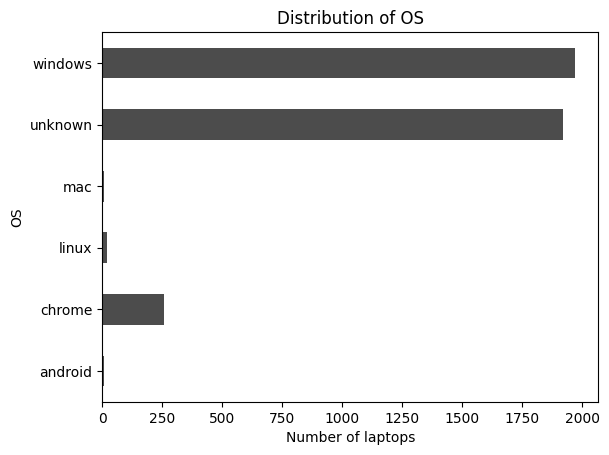

Feature name: Storage Type


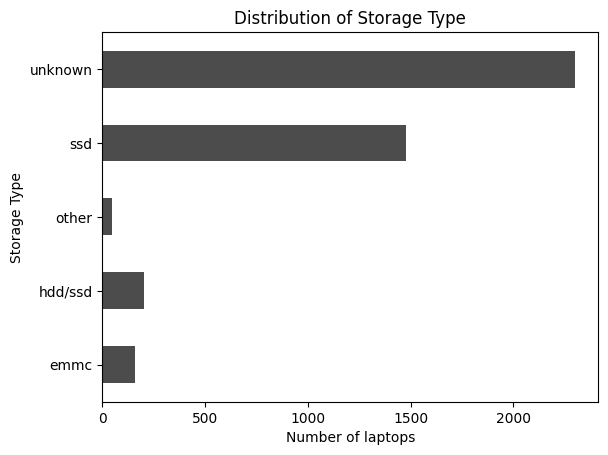

Feature name: Hard Drive Capacity Unit


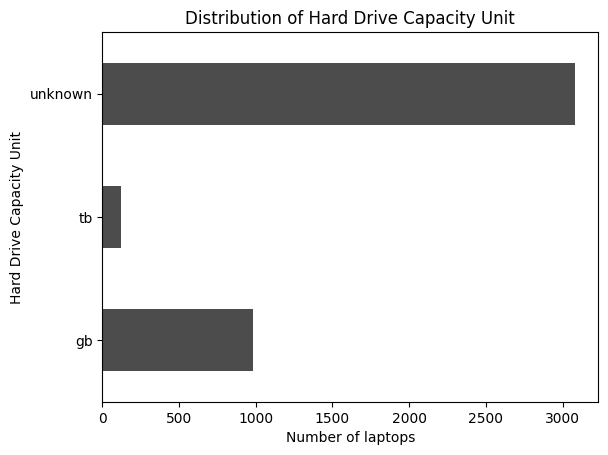

Feature name: SSD Capacity Unit


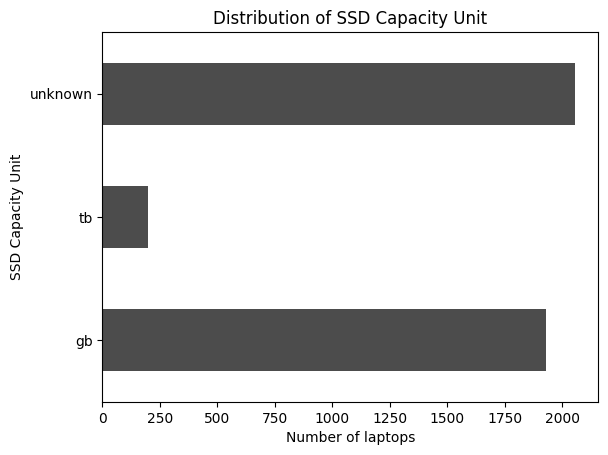

Feature name: Ram Size Unit


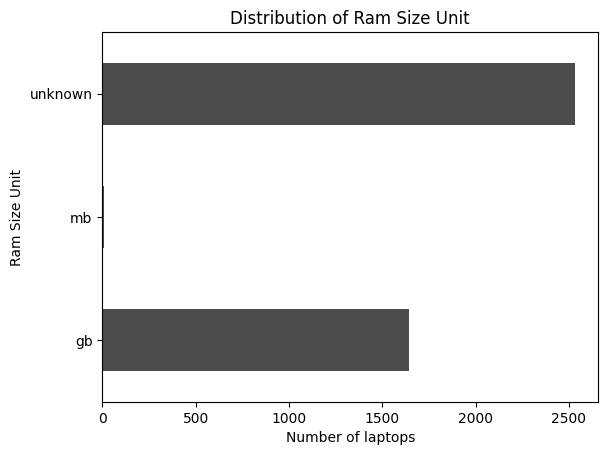

In [31]:
# Visualising the unique categories
def visualise_category(feature):
    feature_dist = laptop_df.groupby(feature).size()
    feature_dist.plot(kind='barh', color='black', alpha=0.7)
    plt.title(f"Distribution of {feature}")
    plt.xlabel("Number of laptops")
    plt.ylabel(feature)
    plt.show()

uniq_categories = uniq_cateogiies[:]
uniq_categories.remove("Condition Description")

irr_columns = []
for feature in uniq_cateogiies:

    # Check if the feature has only one unique value
    if len(laptop_df[feature].unique()) <= 3:
        irr_columns.append(feature)

    print(f"Feature name: {feature}")
    visualise_category(feature)


In [32]:
irr_columns

['Currency',
 'Processor Speed Unit',
 'Type',
 'Hard Drive Capacity Unit',
 'SSD Capacity Unit',
 'Ram Size Unit']